In [72]:
import keras
from keras.datasets import boston_housing

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.preprocessing import scale
import numpy as np

In [73]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
x_train_scaled = preprocessing.scale(x_train)
scaler = preprocessing.StandardScaler().fit(x_train)
x_test_scaled = scaler.transform(x_test)


In [74]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='relu'))

model.compile(loss='mse', 
 optimizer=RMSprop(), 
 metrics=['mse'])



history = model.fit(x_train_scaled, y_train,
 batch_size=128,
epochs=500,
verbose=1,
validation_split = 0.2,
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 
20)])

Epoch 1/500
3/3 [==============================] - 1s 137ms/step - loss: 559.7583 - mse: 559.7583 - val_loss: 590.6465 - val_mse: 590.6465
Epoch 2/500
3/3 [==============================] - 0s 16ms/step - loss: 524.7598 - mse: 524.7598 - val_loss: 563.2877 - val_mse: 563.2877
Epoch 3/500
3/3 [==============================] - 0s 14ms/step - loss: 504.5732 - mse: 504.5732 - val_loss: 537.4183 - val_mse: 537.4183
Epoch 4/500
3/3 [==============================] - 0s 16ms/step - loss: 459.8810 - mse: 459.8810 - val_loss: 510.8948 - val_mse: 510.8948
Epoch 5/500
3/3 [==============================] - 0s 13ms/step - loss: 453.6940 - mse: 453.6940 - val_loss: 484.1638 - val_mse: 484.1638
Epoch 6/500
3/3 [==============================] - 0s 14ms/step - loss: 425.8442 - mse: 425.8442 - val_loss: 456.8513 - val_mse: 456.8513
Epoch 7/500
3/3 [==============================] - 0s 18ms/step - loss: 393.8027 - mse: 393.8027 - val_loss: 428.4756 - val_mse: 428.4756
Epoch 8/500
3/3 [================

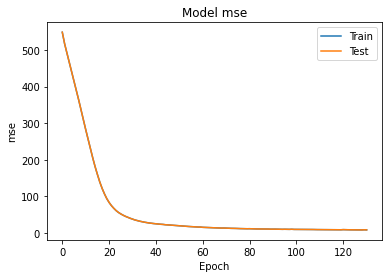

In [75]:
plt.plot(history.history['mse'])
plt.plot(history.history['mse'])
plt.title('Model mse')
plt.ylabel('mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

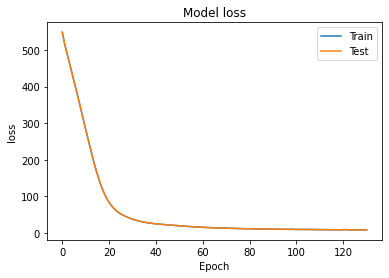

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [77]:
score = model.evaluate(x_test_scaled, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 26.947986602783203
Test accuracy: 26.947986602783203


In [78]:

prediction = model.predict(x_test_scaled)
print(prediction.flatten())
print(y_test)


[ 8.263525  18.993547  21.146301  32.214245  25.141977  19.216026
 27.089848  21.74876   19.325846  23.704418  16.794075  17.231102
 15.019115  42.598347  19.581154  18.953043  26.80234   21.530005
 21.305714  38.93907   12.616013  15.412332  20.672749  14.882706
 20.754652  26.0904    31.43596   29.05463   10.64971   20.486485
 19.235722  15.1076765 33.171402  25.321917  18.681671   8.374042
 16.153984  18.069891  20.728167  26.820433  30.069527  28.195074
 15.251356  40.91298   30.325724  25.254803  26.79948   16.810633
 24.663754  22.14035   35.00549   19.64227   13.359828  14.975404
 35.62596   28.27508   12.836162  49.09989   34.0214    23.681183
 25.808107  18.110725  15.346511  18.183266  23.310144  22.667336
 13.9464245 23.006712  15.079898   6.548727  38.61918   30.272144
 27.386944  15.644916  25.969126  18.653032  19.5273    23.418728
 36.289173  11.979018  20.446167  39.206356  15.258782  14.442928
 17.959219  18.446718  21.105978  21.056284  22.426594  31.936264
 20.169098